### Fitting Logistic Regression

In this first notebook, you will be fitting a logistic regression model to a dataset where we would like to predict if a transaction is fraud or not.

To get started let's read in the libraries and take a quick look at the dataset.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import array

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('./data/xaxis/train.csv')
df_test = pd.read_csv('./data/xaxis/test.csv')

df2 = df.drop(['publisher','placement','device_model','response'],1)

#Some websites are NaN but do have a response of 1 so replacing them with unknown
#df.dropna(inplace=True)
df['domain'].fillna('Unknown',inplace=True)
df[(df['domain']=='Unknown') & (df['response']==1)].head()
df.columns

Index(['placement', 'position', 'browser', 'carrier', 'domain', 'supply_type',
       'language', 'region', 'os_extended', 'publisher', 'device_model',
       'device_type', 'user_day', 'user_hour', 'size', 'response'],
      dtype='object')

In [3]:
#Response
dfy=df['response']

#Features, create dummies for categorical variables
myarr=df2['device_type'].unique()
newarr=np.arange(len(myarr))
print(newarr)
for i in newarr:
    myarr[i]='device{}'.format(i)
df2[myarr]=pd.get_dummies(df['device_type'])
df2.drop('device_type',axis=1,inplace=True)
print(df2.head())

myarr=df2['size'].unique()
newarr=np.arange(len(myarr))
print(newarr)
for i in newarr:
    myarr[i]='size{}'.format(i)
df2[myarr]=pd.get_dummies(df['size'])
df2.drop('size',axis=1,inplace=True)
df2.head()

for col in df2.columns:
    print(col,df2[col].unique())
#    print(df2[col].isnull().values.any())

df2.columns

[0 1 2 3 4 5]
   position  browser  carrier         domain  supply_type  language  region  \
0         0       18      283   dramacity.se            1         1       0   
1         0        8        1   dramacity.se            1         1       0   
2         0        8        1  kissasian.com            1         1       0   
3         0        9        1     icdrama.se            1         2       0   
4         0       21        1  kissasian.com            1         1       0   

   os_extended  user_day  user_hour     size  device0  device1  device2  \
0          137         2         14  300x250        0        1        0   
1           92         6         13  300x250        0        1        0   
2          141         4         11  300x250        0        0        1   
3           80         2         11  300x250        0        0        0   
4          155         6         11  300x250        0        1        0   

   device3  device4  device5  
0        0        0        0 

Index(['position', 'browser', 'carrier', 'domain', 'supply_type', 'language',
       'region', 'os_extended', 'user_day', 'user_hour', 'device0', 'device1',
       'device2', 'device3', 'device4', 'device5', 'size0', 'size1', 'size2',
       'size3', 'size4'],
      dtype='object')

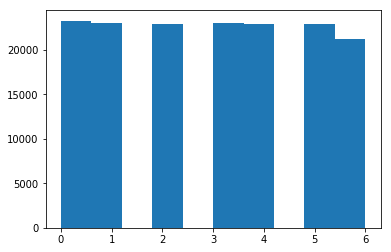

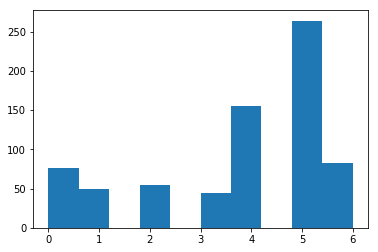

3.0 4.0


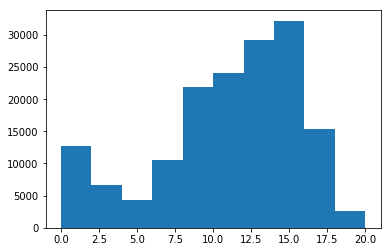

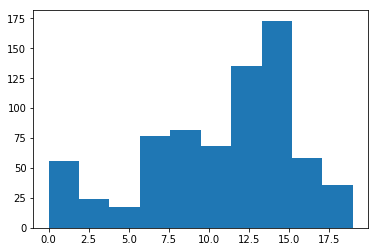

10.54341683932944 10.90633608815427


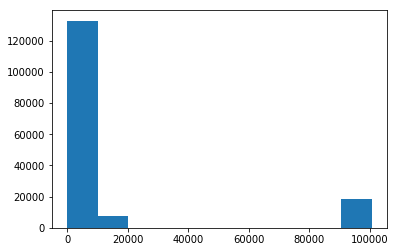

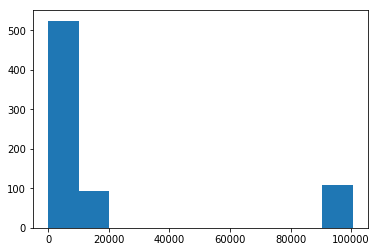

12638.705701010862 17053.600550964187


In [4]:
bkg= df[(df.response==0)]
sig= df[(df.response==1)]

var='user_day'
plt.hist(bkg[var])
plt.show()
plt.hist(sig[var])
plt.show()
print(np.median(bkg[var]),np.median(sig[var]))

var='user_hour'
plt.hist(bkg[var])
plt.show()
plt.hist(sig[var])
plt.show()
print(np.mean(bkg[var]),np.mean(sig[var]))

var='device_model'
plt.hist(bkg[var])
plt.show()
plt.hist(sig[var])
plt.show()
print(np.mean(bkg[var]),np.mean(sig[var]))

In [3]:
df.groupby(['region']).size()

region
0    153266
1       616
2      1435
4      4622
5        57
dtype: int64

In [4]:
df.groupby(['carrier']).size()

carrier
1      127984
60         57
282     13168
283     11664
284      7123
dtype: int64

In [38]:
df['publisher'].value_counts()

633687     78391
995228     22326
760478      7973
999999      6587
476215      5652
293282      3695
664349      3176
820132      2723
592198      2379
451274      1787
991633      1124
949105       891
367049       857
887014       799
860041       741
665640       689
860040       591
767135       587
665210       547
667657       543
931175       508
760748       485
448198       453
922476       424
991188       411
286640       389
694930       367
994925       355
537015       343
66177        321
           ...  
540861         1
991358         1
451270         1
807952         1
765637         1
1018945        1
763881         1
764606         1
762601         1
591804         1
761283         1
1028493        1
189864         1
478453         1
521896         1
1034469        1
1054514        1
68598          1
888953         1
1011446        1
1031101        1
582279         1
301657         1
970344         1
765628         1
563780         1
762438         1
838736        

There are 823 Unique Publisher values

In [10]:
print(sorted(df['browser'].unique()))
len(df['browser'].unique())

print(sorted(df['user_hour'].unique()))

[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [102]:
from sklearn import preprocessing
np.mean(df['carrier'])
#preprocessing.normalize(df['carrier'])

57.305332633315835

In [170]:
#Categorize the websites
print(len(df['domain'].unique()))
#print(df['domain'].sort_values().unique())

df.groupby(['browser','domain']).size()

df.groupby(['language','domain']).size()

#newgroup = df.groupby(['domain','user_day','user_hour']).size()
#print(newgroup)

newgroup = pd.DataFrame({'count':df.groupby('domain')['user_hour'].size().sort_values()}).reset_index()
print(newgroup.tail())
domain_names = newgroup['domain']
count_val = newgroup['count']
#print(domain_names)
print(count_val)
#Lets make bins <5 <100 < 500 < 1000 < 3000 < 5000 < 10000 < 20000 > 20000
#newgroup[newgroup['count']<=5] = 0
minval=[0,   5,1000,2000, 5000,10000,15000,20000,30000,40000]
maxval=[5,1000,2000,5000,10000,15000,20000,30000,40000,100000]
for i in range(9):
    newgroup['count'][(newgroup['count'] >= minval[i]) & (newgroup['count'] < maxval[i])] = i

2699
             domain  count
2694        msn.com   6123
2695     icdrama.se  10212
2696   dramacity.se  14134
2697        Unknown  20692
2698  kissasian.com  37601
0           1
1           1
2           1
3           1
4           1
5           1
6           1
7           1
8           1
9           1
10          1
11          1
12          1
13          1
14          1
15          1
16          1
17          1
18          1
19          1
20          1
21          1
22          1
23          1
24          1
25          1
26          1
27          1
28          1
29          1
        ...  
2669      551
2670      577
2671      583
2672      587
2673      720
2674      756
2675      799
2676      826
2677      834
2678      844
2679      847
2680      891
2681      926
2682     1071
2683     1124
2684     1185
2685     1283
2686     1858
2687     1875
2688     2379
2689     2579
2690     2723
2691     3350
2692     3357
2693     3390
2694     6123
2695    10212
2696    14134
2697   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [176]:
mydict = newgroup.set_index('domain').to_dict()['count']

print(mydict)

dfsmall = df.head(100)
dfsmall['domgrps'] = dfsmall['domain'].replace(mydict)
print(dfsmall.head())
df['domain'] = df['domain'].replace(mydict)
#grouped = df.groupby(['domain'],as_index=False).agg({'user_hour':np.sum,'response':np.sum}).sort_values(by='user_hour')
#print(grouped)
df.head()

{'landezine.com': 0, 'lincyscookart.com': 0, 'liketotally80s.com': 0, 'likelo.me': 0, 'lfg.co': 0, 'lexusownersclub.com': 0, 'legendaryfind.com': 0, 'lecturas.com': 0, 'lebahndut.net': 0, 'learnersdictionary.com': 0, 'learn-english-online.org': 0, 'lazygirls.info': 0, 'layersofhappiness.com': 0, 'latercera.com': 0, 'lankapropertyweb.com': 0, 'landwatch.com': 0, 'lance.com.br': 0, 'lancashiretelegraph.co.uk': 0, 'linuxandubuntu.com': 0, 'lalawin.com': 0, 'littlebitfunky.com': 0, 'littleoslo.com': 0, 'manjulaskitchen.com': 0, 'managerzone.com': 0, 'management-issues.com': 0, 'mamaktalk.com': 0, 'malaysiadreamnews.com': 0, 'magazinedee.com': 0, 'mackolik.com': 0, 'macdailynews.com': 0, 'lyngsat-maps.com': 0, 'ludlowadvertiser.co.uk': 0, 'loveradio.com.ph': 0, 'lovelifepoems.net': 0, 'loseweightbyeating.com': 0, 'los40.com': 0, 'lm-us.com': 0, 'llifle.com': 0, 'livingincebuforums.com': 0, 'littlejapanmama.com': 0, 'lakshmipur24.com': 0, 'ladyissue.com': 0, 'kugli.com': 0, 'justanimestream.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


   placement  position  browser  carrier         domain  supply_type  \
0    6360701         0       18      283   dramacity.se            1   
1    6360701         0        8        1   dramacity.se            1   
2    6360701         0        8        1  kissasian.com            1   
3    6360701         0        9        1     icdrama.se            1   
4    6360701         0       21        1  kissasian.com            1   

   language  region  os_extended  publisher  device_model  device_type  \
0         1       0          137     633687             0            1   
1         1       0           92     633687             0            1   
2         1       0          141     633687         11995            2   
3         2       0           80     633687           300            3   
4         1       0          155     633687             0            1   

   user_day  user_hour size  response  domgrps  
0         2         14    5         0        5  
1         6         13  

,placement,position,browser,carrier,domain,supply_type,language,region,os_extended,publisher,device_model,device_type,user_day,user_hour,size,response,domgrps
0,6360701,0,18,283,5,1,1,0,137,633687,0,1,2,14,5,0,5
1,6360701,0,8,1,5,1,1,0,92,633687,0,1,6,13,5,0,5
2,6360701,0,8,1,8,1,1,0,141,633687,11995,2,4,11,5,0,8
3,6360701,0,9,1,5,1,2,0,80,633687,300,3,2,11,5,0,5
4,6360701,0,21,1,8,1,1,0,155,633687,0,1,6,11,5,0,8


In [179]:
dfsmall[['domain','domgrps','response']]
mydict2={'pc & other devices':1,'phone':2,'tablet':3,'game console':4,'set top box':5, 'tv':6}
#df['device_type'] = df['device_type'].replace(mydict2)
df.head()
len(df.columns)
df.head()

,placement,position,browser,carrier,domain,supply_type,language,region,os_extended,publisher,device_model,device_type,user_day,user_hour,size,response,domgrps
0,6360701,0,18,283,5,1,1,0,137,633687,0,1,2,14,5,0,5
1,6360701,0,8,1,5,1,1,0,92,633687,0,1,6,13,5,0,5
2,6360701,0,8,1,8,1,1,0,141,633687,11995,2,4,11,5,0,8
3,6360701,0,9,1,5,1,2,0,80,633687,300,3,2,11,5,0,5
4,6360701,0,21,1,8,1,1,0,155,633687,0,1,6,11,5,0,8


In [186]:
df['size'].unique()

mydict3={df['size'][0]:1,df['size'][1]:2,df['size'][2]:3,df['size'][3]:4,df['size'][4]:5}
print(mydict3)
df['size'] = df['size'].replace(mydict3)
df['size'].unique()
mydict4={'720x90':1,'160x600':2,'300x600':3}
df['size'] = df['size'].replace(mydict4)
df['size'].unique()
mydict4={'728x90':1}
df['size'] = df['size'].replace(mydict4)
df['size'].unique()
df.drop('domgrps',1)

{5: 5}


TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [188]:
df = df.drop('domgrps',1)
df.head()

,placement,position,browser,carrier,domain,supply_type,language,region,os_extended,publisher,device_model,device_type,user_day,user_hour,size,response
0,6360701,0,18,283,5,1,1,0,137,633687,0,1,2,14,5,0
1,6360701,0,8,1,5,1,1,0,92,633687,0,1,6,13,5,0
2,6360701,0,8,1,8,1,1,0,141,633687,11995,2,4,11,5,0
3,6360701,0,9,1,5,1,2,0,80,633687,300,3,2,11,5,0
4,6360701,0,21,1,8,1,1,0,155,633687,0,1,6,11,5,0


In [75]:
df1 = df[(df.browser==0)]
df2 = df[(df.browser==4)]

df1['domain'].unique()

array(['google.com', nan, 'kissasian.com', 'dramacity.se',
       'vppgamingnetwork.com', 'dramatvb.se', 'icdrama.se',
       'business-solutions.us', 'baomoi.com', 'ondramanice.com',
       'kissanime.ru', 'desitvbox.net', 'ondramacool.com', 'w3schools.com',
       'layanon9.biz', 'yahoo.com', '24h.com.vn', 'terra.com.br',
       'afamily.vn', 'woaikanxi.net', 'ikshow.net', 'roleplayrepublic.com',
       'business-articles.net', 'binbox.io', 'starbounder.org',
       'dantri.com.vn', 'infonet.vn', 'okezone.com',
       'consolegameswiki.com', 'hoofoot.com', 'drama365.se',
       'business-article.me', 'tekkenzaibatsu.com', 'tvarticles.me',
       'thewindowsclub.com', 'goodanime.co', 'check4d.com', 'esohead.com',
       'thesimsresource.com', 'msn.com', 'gsmarena.com', 'on9drama.com',
       'lamchame.com', 'dittotv.com', 'myanimelist.net',
       'freemalaysiatoday.com', 'wattpad.com', 'genfb.com',
       'antaranews.com', 'malaysia-chronicle.com', 'informer.com',
       'cari.com.my

In [76]:
df2['domain'].unique()

array(['wuxiaworld.com', nan, 'business-solutions.us',
       'malaysia-chronicle.com', 'kissasian.com', 'msn.com', 'check4d.com',
       'dailymail.co.uk', 'nextmedia.com', 'express.co.uk', 'icdrama.se',
       'yahoo.com', 'desitvbox.net', 'angsarap.net', 'famousbirthdays.com',
       '24livenewspaper.com', 'mydramalist.com', 'dramacity.se',
       'kissanime.ru', 'bd-pratidin.com', 'cari.com.my', 'desirulez.me',
       'newnation.sg', 'freemalaysiatoday.com', 'bukancincai.org',
       'metro.co.uk'], dtype=object)

Browser values are not unique groups as some domain names overlap between the two browser groups. So what else?

(array([ 12719.,   6708.,   4277.,  10568.,  21928.,  24075.,  29258.,
         32370.,  15368.,   2725.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.]),
 <a list of 10 Patch objects>)

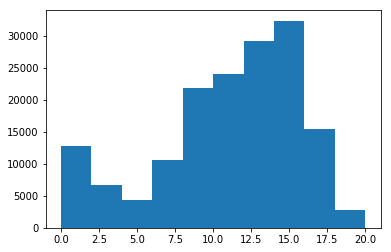

In [232]:
df['user_hour'].sort_values().unique()
plt.hist(df['user_hour'])

In [192]:
bkg= df[(df.response==0)]
sig= df[(df.response==1)]

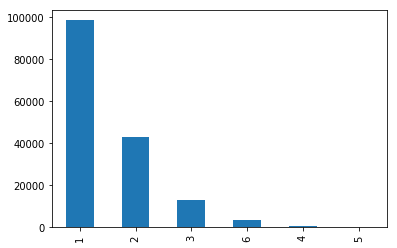

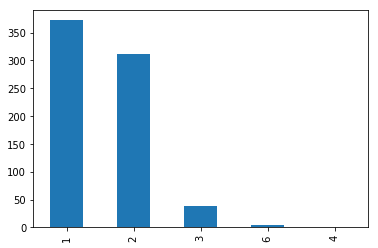

In [146]:
bkg['device_type'].value_counts().plot(kind='bar')
plt.show()

sig['device_type'].value_counts().plot(kind='bar')
plt.show()

In [8]:
import matplotlib.pyplot as plt
% matplotlib inline
df1 = df[['domain','browser','device_type','device_model','user_hour','response']]

grouped = df1.groupby(['domain'],as_index=False).agg({'user_hour':np.mean,'response':np.sum}).sort_values(by='user_hour')

#Number of clicks per average user hour
grouped2 = grouped.assign(cph=grouped['response']/grouped['user_hour'])

print(grouped2)

grouped2 = grouped2[grouped2['cph']!=0.0].sort_values(by='cph')
print(grouped2)

#Tag the domains with total response/#Mean user hour
#Domains with zero response are given a number 0 and so on, make 10 categories of domains.
#grouped[['user_hour','response']]



                        domain  user_hour  response  cph
2365        thesportsdaily.com   0.000000         0  NaN
385                cadceed.com   0.000000         0  NaN
1969          reignofblood.net   0.000000         0  NaN
419          carsalesindia.com   0.000000         0  NaN
1581         moviemistakes.com   0.000000         0  NaN
1955          readwestbrom.com   0.000000         0  NaN
1954       readsouthampton.com   0.000000         0  NaN
1624             myrapname.com   0.000000         0  NaN
1215               issuein.com   0.000000         0  NaN
2137           smackjeeves.com   0.000000         0  NaN
826              flagworld.com   0.000000         0  NaN
47            abiturients.info   0.000000         0  NaN
1900           prohunters.info   0.000000         0  NaN
629           directexpose.com   0.000000         0  NaN
890               ft86club.com   0.000000         0  NaN
1403        littlebitfunky.com   0.000000         0  NaN
1063               have8tv.com 

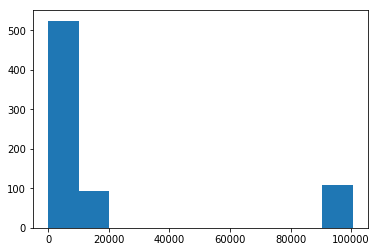

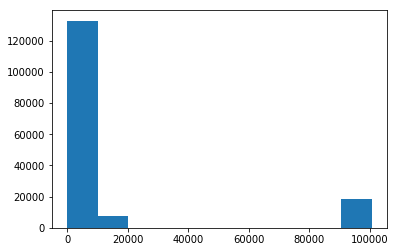

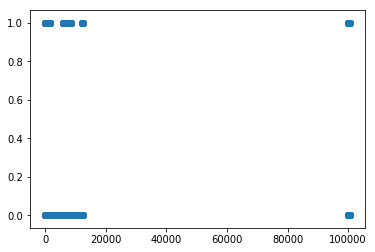

In [112]:
plt.hist(sig['device_model'])
plt.show()
plt.hist(bkg['device_model'])
plt.show()
plt.scatter(df['device_model'],df['response'])
plt.show()

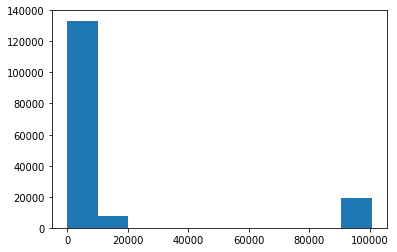

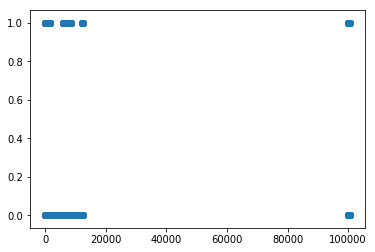

In [147]:
plt.hist(df['device_model'])
plt.show()
plt.scatter(df['device_model'],df['response'])
plt.show()

In [196]:
def plt_hist(var):
    plt.hist(bkg[var],alpha=0.25)
    label=var
    plt.xlabel(var)
    plt.show()
    plt.hist(sig[var],alpha=0.75)
    label=var
    plt.xlabel(var+"_sig")
    plt.show()
    plt.scatter(df[var],df['response'])
    plt.show()

In [164]:
print(df['size'].isnull().values.any())
df['size']

False


0               5
1               5
2               5
3               5
4               5
5          320x50
6          728x90
7          320x50
8               5
9          320x50
10              5
11         728x90
12         320x50
13         320x50
14         320x50
15              5
16              5
17         320x50
18        160x600
19              5
20         320x50
21              5
22        160x600
23              5
24         320x50
25         320x50
26         320x50
27              5
28              5
29         320x50
           ...   
159966     320x50
159967     320x50
159968          5
159969     320x50
159970          5
159971     320x50
159972     320x50
159973     320x50
159974          5
159975          5
159976     320x50
159977     320x50
159978     320x50
159979          5
159980     728x90
159981     320x50
159982     320x50
159983     728x90
159984          5
159985          5
159986          5
159987          5
159988          5
159989          5
159990    

placement


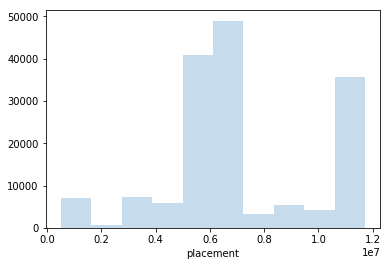

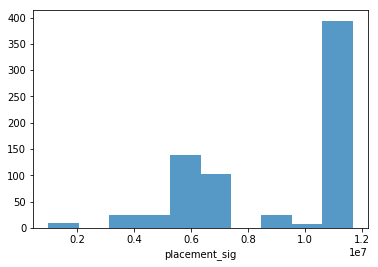

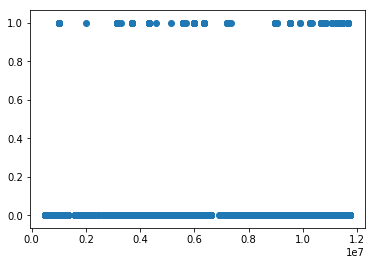

position


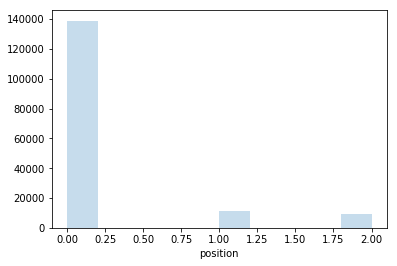

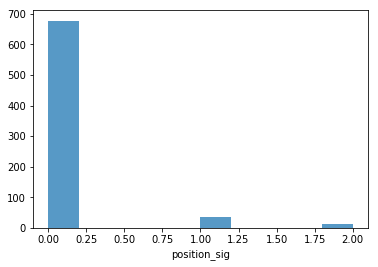

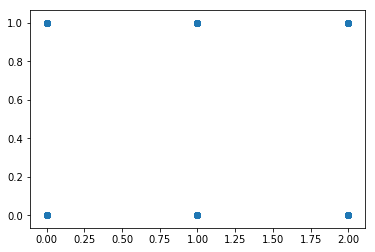

browser


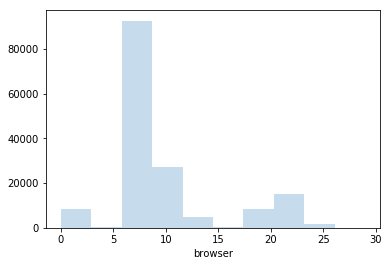

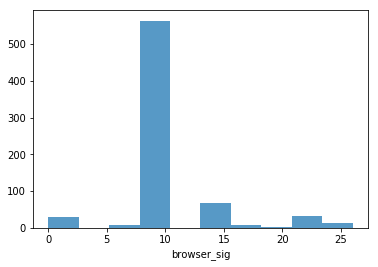

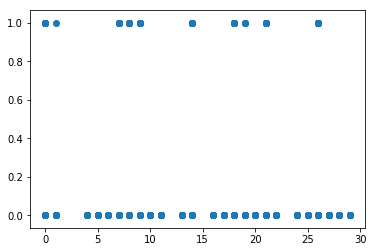

carrier


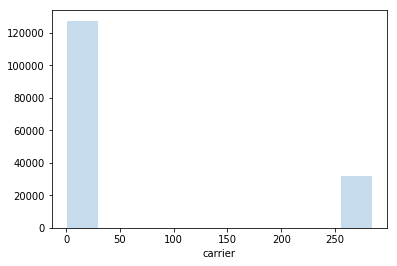

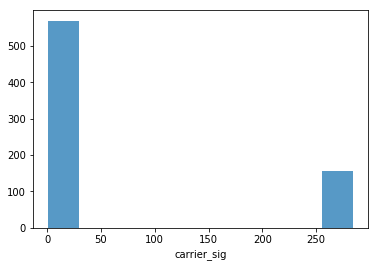

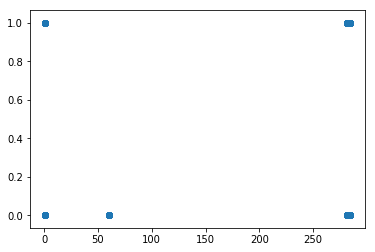

domain


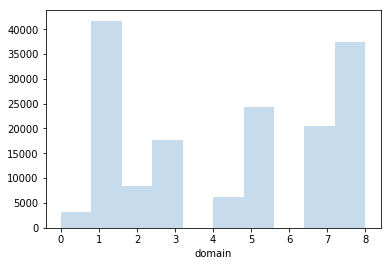

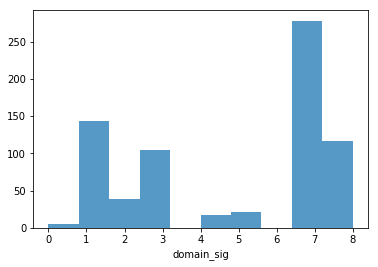

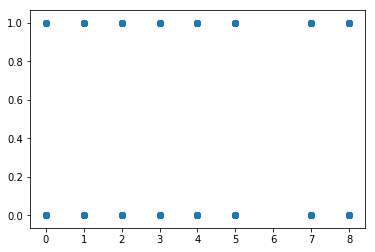

supply_type


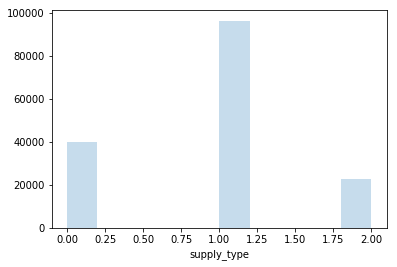

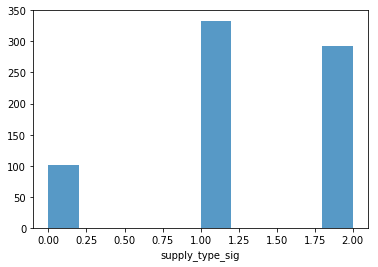

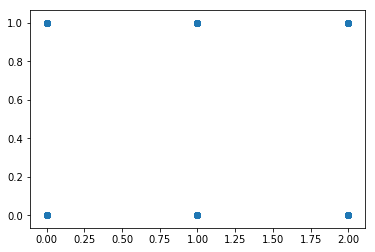

language


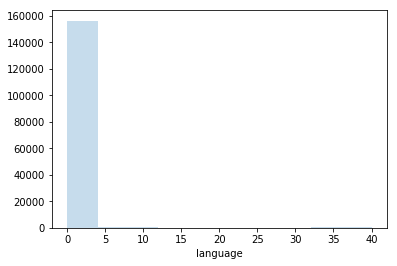

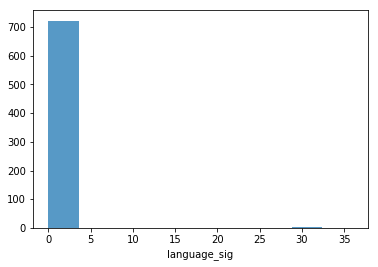

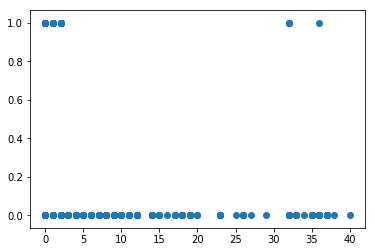

region


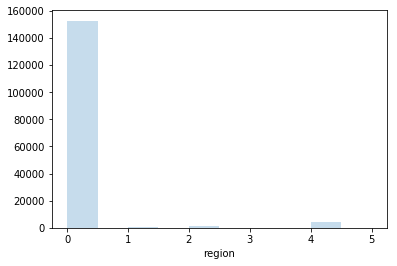

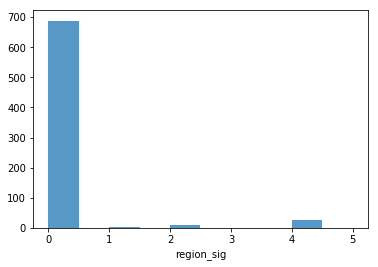

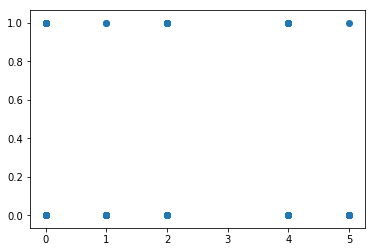

os_extended


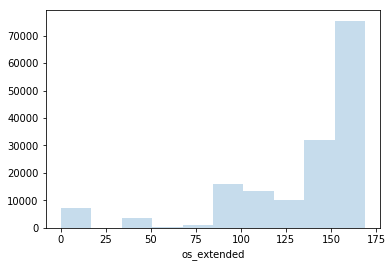

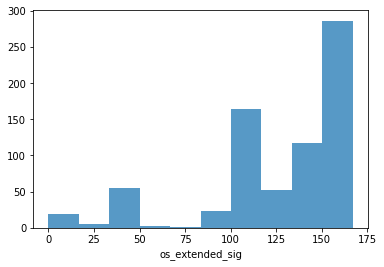

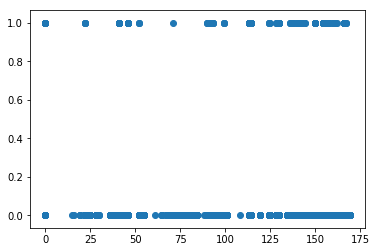

publisher


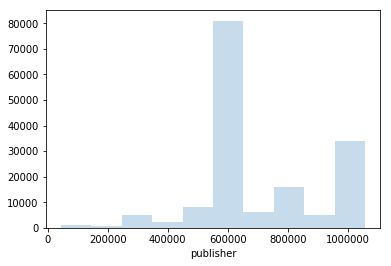

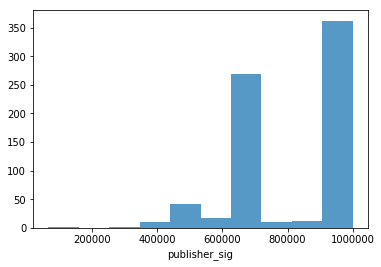

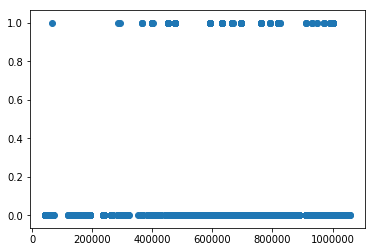

device_model


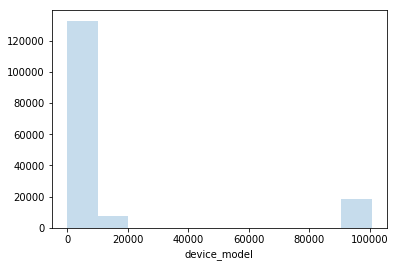

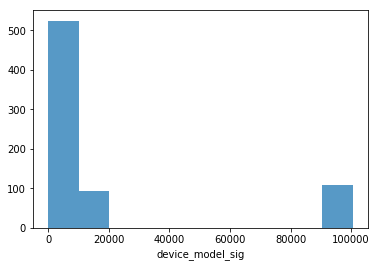

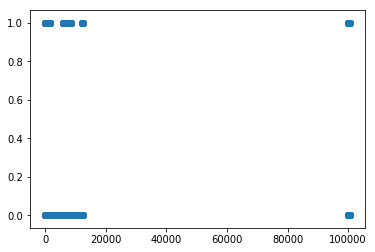

device_type


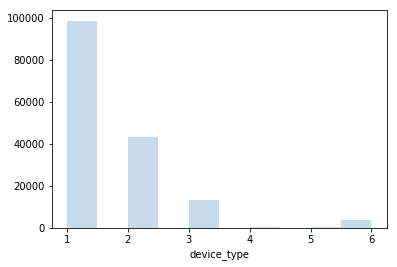

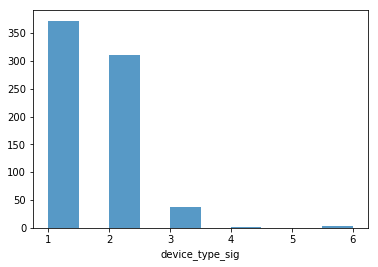

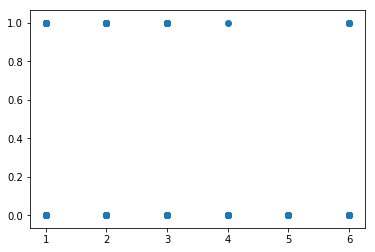

user_day


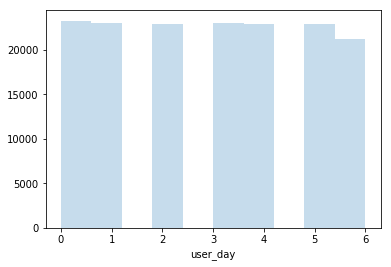

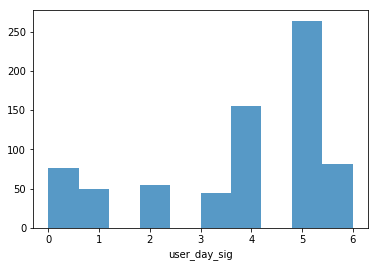

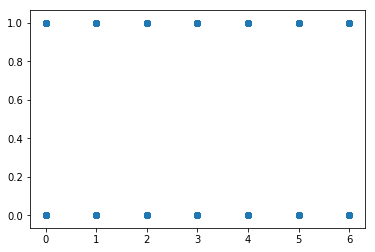

user_hour


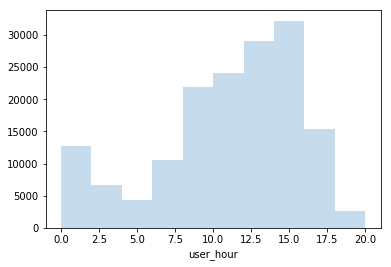

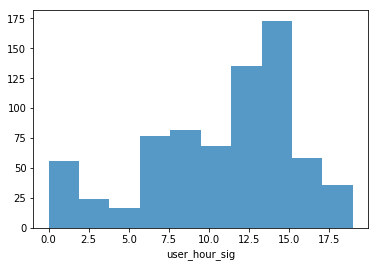

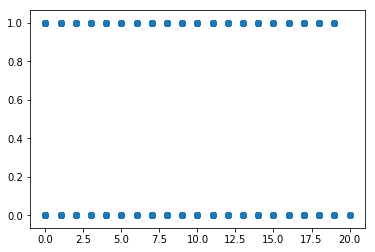

size


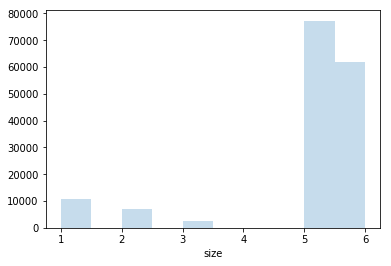

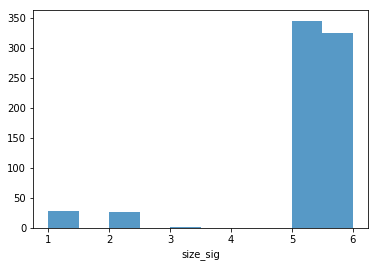

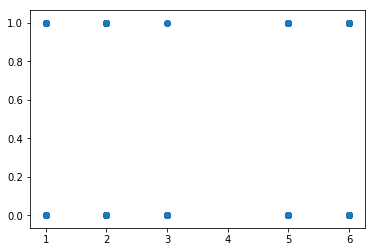

response


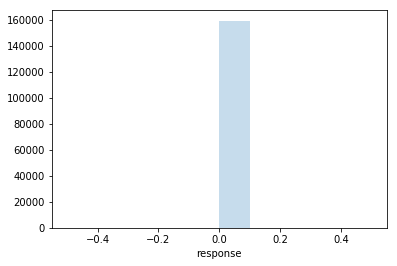

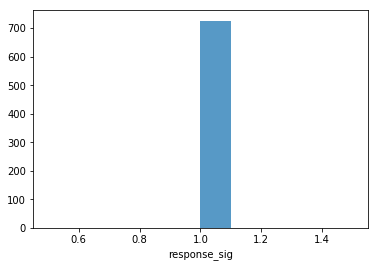

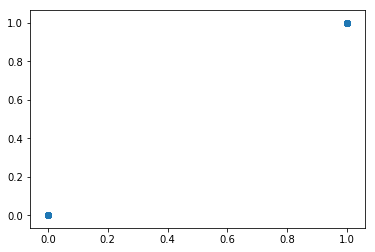

In [197]:
df['device_type']
for name in df.columns:
        print(name)
        plt_hist(name)

[0.71705426356589153, 0.74626865671641784, 0.76923076923076927, 0.81300813008130079, 0.8280254777070063, 0.86227544910179643, 0.87362171331636973, 0.87547811304717382, 0.88495575221238942, 0.89564369310793235, 0.9042553191489362, 0.90909090909090917, 0.98452278589853826, 0.98565478944932905, 1.0268199233716473, 1.0416666666666667, 1.0424710424710424, 1.25, 1.3647401651287034, 1.4464285714285716, 1.5643564356435644, 1.7042846212700842, 1.7064846416382251, 1.7290799815071662, 1.7688679245283017, 1.7751251443973814, 1.7935590421139556, 1.7964071856287425, 1.8867924528301887, 2.0112061338838103, 2.0122399020807831, 2.0253164556962027, 2.1355932203389831, 2.1444847666469742, 2.3521850899742933, 2.3561395559583147, 2.4260496183206106, 2.4693140794223827, 2.5, 2.5806451612903225, 2.8163900414937757, 3.087248322147651, 3.4441489361702127, 3.4795879435330028, 3.945111492281304, 4.3021914648212221, 4.6957403651115621, 4.9298156604092673, 6.1370667089712061, 6.6525423728813564, 7.6147540983606552

(array([ 64.,   1.,   0.,   0.,   1.]),
 array([   0.71705426,   25.20546371,   49.69387315,   74.18228259,
          98.67069203,  123.15910147]),
 <a list of 5 Patch objects>)

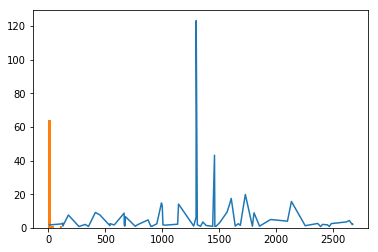

In [212]:
rate = grouped['response']/grouped['user_hour']*10
rate.dropna(inplace=True)
rate = rate[rate!=0]

print(sorted(rate.unique()))
plt.plot(rate)
plt.hist(rate,bins=5)

Now drop the response and domain features in the data and form a new dataset df_features.

In [163]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(df2)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  


[  8.87403479e-01   1.08367262e-01   1.77345733e-03   1.47132921e-03
   5.59807136e-04   2.73088028e-04   3.34511081e-05   3.26139618e-05
   2.84900429e-05   2.35103440e-05]
[ 45099.54579754  15760.16121614   2016.14598937   1836.39682673
   1132.74152033    791.15747499    276.8961128     273.40936364
    255.53956811    232.13525175]


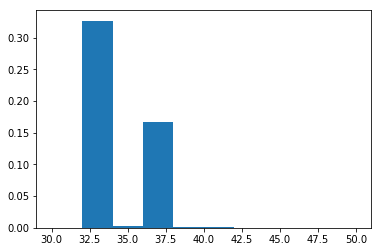

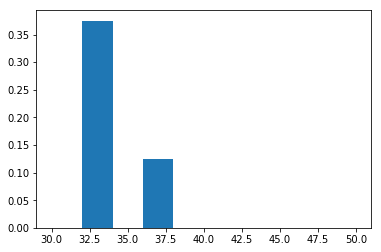

In [214]:
plt.hist(bkg['region']+bkg['language'],normed=1,range=(30.0,50.0))
plt.show()
plt.hist(sig['region']+sig['language'],normed=1,range=(30.0,50.0))
plt.show()